# **Predicting California Housing Prices Using Regression Models**

## **1. Project Overview (Executive Summary)**

### Background
Prediksi harga rumah yang akurat memiliki peran penting dalam pasar properti, baik bagi pembeli maupun penjual.  
Di California — salah satu pasar perumahan paling dinamis di Amerika Serikat — fluktuasi harga sangat dipengaruhi oleh faktor demografis, geografis, dan ekonomi seperti lokasi, tingkat pendapatan, serta usia bangunan.  
Model prediktif yang dibangun berdasarkan data historis perumahan memungkinkan agen properti, lembaga keuangan, dan pembuat kebijakan untuk memperkirakan nilai pasar secara lebih efisien.

### Objective
Proyek ini bertujuan untuk **membangun model regresi terawasi (supervised regression model)** yang mampu memprediksi *nilai median rumah* di berbagai distrik di California menggunakan variabel sosial-ekonomi dan geografis dari data sensus.  
Model ini diharapkan dapat berfungsi sebagai alat rekomendasi awal untuk:
- **Perusahaan properti**, dalam menentukan harga jual yang kompetitif  
- **Bank**, untuk memperkirakan nilai agunan properti  
- **Pembuat kebijakan**, dalam menganalisis distribusi keterjangkauan perumahan  

### Type of Machine Learning Problem
Proyek ini termasuk dalam kategori **Supervised Machine Learning Regression Problem**, di mana variabel target (`median_house_value`) bersifat kontinu dan merepresentasikan nilai median rumah (dalam USD) pada setiap wilayah atau blok sensus.

### Business Motivation
Dengan pendekatan berbasis data, model prediksi ini dapat:
- Memberikan estimasi harga properti yang konsisten dan bebas bias  
- Mendukung proses penilaian agunan atau risiko kredit dengan lebih cepat  
- Memungkinkan penerapan sistem harga dinamis berdasarkan lokasi dan tingkat pendapatan  


## **2. Business Understanding**

### Problem Statement  
Harga rumah di California bervariasi secara signifikan karena perbedaan tingkat pendapatan, lokasi geografis, usia bangunan, dan kepadatan penduduk.  
Agen properti, lembaga keuangan, serta pembuat kebijakan sering kali mengalami kesulitan dalam memperkirakan harga pasar yang wajar secara cepat dan objektif.  
Tanpa sistem prediktif berbasis data, estimasi harga masih sangat bergantung pada penilaian manual — yang cenderung lambat, mahal, dan rentan terhadap bias subjektif.

### Business Question  
Bagaimana cara kita **memprediksi nilai median rumah** di suatu distrik di California dengan menggunakan data demografis dan geografis yang tersedia secara publik?  
Faktor-faktor apa saja (seperti pendapatan, jarak ke laut, dan populasi) yang paling berkontribusi terhadap variasi harga rumah?

### Business Objectives  
- Membangun **model regresi berbasis data** yang mampu memprediksi harga rumah secara akurat.  
- Mengidentifikasi **faktor utama (key drivers)** yang menyebabkan perbedaan harga antar wilayah.  
- Menyediakan **referensi harga yang andal** untuk mendukung keputusan finansial maupun kebijakan publik.  

### Stakeholders  
| Stakeholder | Kebutuhan / Peran |
|--------------|--------------------|
| **Perusahaan properti** | Menentukan harga jual yang kompetitif untuk properti baru |
| **Bank / Lembaga keuangan** | Menilai nilai agunan properti untuk pinjaman dan penilaian risiko |
| **Pemerintah dan perencana kota** | Memahami keterjangkauan perumahan dan ketimpangan harga antar wilayah |

### Goals and Success Metrics  
| Aspek | Definisi |
|--------|-----------|
| **Goal** | Memprediksi `median_house_value` (USD) menggunakan variabel sosial-ekonomi dan spasial |
| **Type of ML Task** | Supervised → Regression |
| **Evaluation Metrics** | RMSE (utama), MAE, dan R² |
| **Target Kinerja** | RMSE ≤ 50.000 USD dan R² ≥ 0.80 |
| **Keberhasilan Bisnis** | Model mampu memberikan estimasi harga yang lebih cepat dan objektif dibanding metode manual |

## **3. Data Understanding**

### Dataset Overview  
Dataset yang digunakan dalam proyek ini adalah **California Housing Dataset**, yang berasal dari sensus Amerika Serikat tahun 1990.  
Setiap baris mewakili informasi agregat dari satu distrik perumahan (disebut juga *block group*), yaitu unit geografis terkecil tempat data sensus dikumpulkan.

| Kolom | Deskripsi | Tipe Data |
|--------|------------|-----------|
| `longitude` | Koordinat geografis (posisi barat–timur) | Numerik |
| `latitude` | Koordinat geografis (posisi utara–selatan) | Numerik |
| `housing_median_age` | Usia median rumah di distrik tersebut | Numerik |
| `total_rooms` | Jumlah total ruangan dalam distrik | Numerik |
| `total_bedrooms` | Jumlah total kamar tidur dalam distrik | Numerik |
| `population` | Jumlah total penduduk di distrik | Numerik |
| `households` | Jumlah rumah tangga dalam distrik | Numerik |
| `median_income` | Pendapatan median rumah tangga (dalam puluhan ribu USD) | Numerik |
| `ocean_proximity` | Variabel kategorikal yang menunjukkan jarak distrik terhadap laut | Kategorikal |
| `median_house_value` | **Variabel target** — nilai median rumah dalam USD | Numerik |

### Data Characteristics  
- Dataset terdiri dari **14.448 baris dan 10 kolom**, mencakup kombinasi fitur numerik dan kategorikal.  
- Variabel `median_house_value` memiliki nilai maksimum **500.001 USD**, yang menandakan adanya *top-coding* pada data sensus (harga rumah di atas batas tersebut tidak ditampilkan secara pasti).  
- Fitur `median_income` dan `ocean_proximity` diperkirakan menjadi kontributor terbesar terhadap variasi harga rumah.  
- Nilai hilang hanya ditemukan pada kolom `total_bedrooms` (~0,95% dari total data) dan akan ditangani dengan metode imputasi median pada tahap *data preparation*.  

### Analytical Purpose  
Tahap pemahaman data (*data understanding*) bertujuan untuk:
- Mengevaluasi struktur dan kualitas dataset (missing values, tipe data, anomali).  
- Mengidentifikasi variabel yang relevan untuk model prediksi harga.  
- Memahami hubungan awal antar variabel numerik dan kategorikal melalui analisis korelasi serta visualisasi distribusi.  


In [1]:
import sys, os, math, textwrap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
csv_path = "/content/data_california_house.csv"

In [4]:
# Load
df = pd.read_csv(csv_path)

# Simpan salinan
df_raw_preview = df.head(10).copy()

# Standarisasi nama kolom
def std_cols(cols):
    return [c.strip().lower().replace(" ", "_") for c in cols]

df.columns = std_cols(df.columns)

# Pemetaan nama
rename_map = {
    "medhouseval": "median_house_value",
    "medianhousevalue": "median_house_value",
    "medinc": "median_income",
    "houseage": "housing_median_age",
    "averooms": "avg_rooms",
    "avebedrms": "avg_bedrooms",
    "aveoccup": "avg_occup",
    "lat": "latitude",
    "lon": "longitude",
}
df = df.rename(columns=rename_map)

# Deteksi target
possible_targets = [c for c in df.columns if c in ("median_house_value", "medhouseval")]
if not possible_targets:
    raise ValueError("Target tidak ditemukan. Harap pastikan kolom 'median_house_value' atau 'MedHouseVal' ada.")
target = possible_targets[0]
print("Target:", target)

df_raw_preview

Target: median_house_value


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
6,-117.80,33.81,14.0,1206.0,142.0,572.0,149.0,8.8470,<1H OCEAN,388700.0
7,-121.26,38.69,17.0,3917.0,638.0,1809.0,564.0,5.2586,INLAND,137000.0
8,-117.65,33.48,6.0,1638.0,188.0,572.0,174.0,13.0502,<1H OCEAN,500001.0
9,-122.27,37.97,10.0,15259.0,2275.0,7266.0,2338.0,6.0666,NEAR BAY,272400.0


In [5]:
# Ukuran dan tipe data
n_rows, n_cols = df.shape
dtypes = df.dtypes.astype(str).to_frame("dtype")

# Missing value
missing = df.isna().sum().to_frame("n_missing")
missing["missing_pct"] = (missing["n_missing"] / n_rows * 100).round(2)
missing = missing.sort_values("missing_pct", ascending=False)

# Ringkasan target
summary = pd.DataFrame({
    "n_rows": [n_rows],
    "n_cols": [n_cols],
    "target": [target],
    "target_min": [df[target].min()],
    "target_max": [df[target].max()],
    "target_mean": [df[target].mean()],
    "target_std": [df[target].std()],
})

display(dtypes.T)
display(missing.head(20))
display(summary)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
dtype,float64,float64,float64,float64,float64,float64,float64,float64,object,float64


,n_missing,missing_pct
total_bedrooms,137,0.95
longitude,0,0.00
latitude,0,0.00
housing_median_age,0,0.00
total_rooms,0,0.00
population,0,0.00
households,0,0.00
median_income,0,0.00
ocean_proximity,0,0.00
median_house_value,0,0.00


,n_rows,n_cols,target,target_min,target_max,target_mean,target_std
0,14448,10,median_house_value,14999.0,500001.0,206824.624516,115365.476182


In [6]:
TOPCODE = 500001.0  # nilai yang sering muncul sebagai batas atas di dataset ini
topcode_count = int((df[target] >= TOPCODE).sum())
topcode_pct = 100 * topcode_count / len(df)

print(f"Nilai target ≥ {TOPCODE}: {topcode_count} baris ({topcode_pct:.2f}%)")

Nilai target ≥ 500001.0: 678 baris (4.69%)


In [7]:
num_cols = [c for c in df.columns if c != target and df[c].dtype != "object"]
cat_cols = [c for c in df.columns if df[c].dtype == "object"]

print("Numerik:", num_cols)
print("Kategori:", cat_cols)

display(df[num_cols + [target]].describe().T)

for c in cat_cols:
    print(f"\nValue counts — {c}")
    display(df[c].value_counts(dropna=False).to_frame("count"))

Numerik: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Kategori: ['ocean_proximity']


,count,mean,std,min,25%,50%,75%,max
longitude,14448.0,-119.566647,2.006587,-124.3500,-121.8000,-118.4900,-118.0000,-114.3100
latitude,14448.0,35.630093,2.140121,32.5400,33.9300,34.2600,37.7100,41.9500
housing_median_age,14448.0,28.618702,12.596694,1.0000,18.0000,29.0000,37.0000,52.0000
total_rooms,14448.0,2640.132683,2191.612441,2.0000,1451.0000,2125.0000,3148.0000,32627.0000
total_bedrooms,14311.0,538.260709,423.577544,1.0000,295.0000,435.0000,647.0000,6445.0000
population,14448.0,1425.157323,1149.580157,3.0000,784.0000,1165.0000,1724.0000,35682.0000
households,14448.0,499.508929,383.098390,1.0000,279.0000,410.0000,604.0000,6082.0000
median_income,14448.0,3.866667,1.891158,0.4999,2.5706,3.5391,4.7361,15.0001
median_house_value,14448.0,206824.624516,115365.476182,14999.0000,119600.0000,180000.0000,263900.0000,500001.0000



Value counts — ocean_proximity


,count
ocean_proximity,
<1H OCEAN,6369
INLAND,4576
NEAR OCEAN,1879
NEAR BAY,1622
ISLAND,2


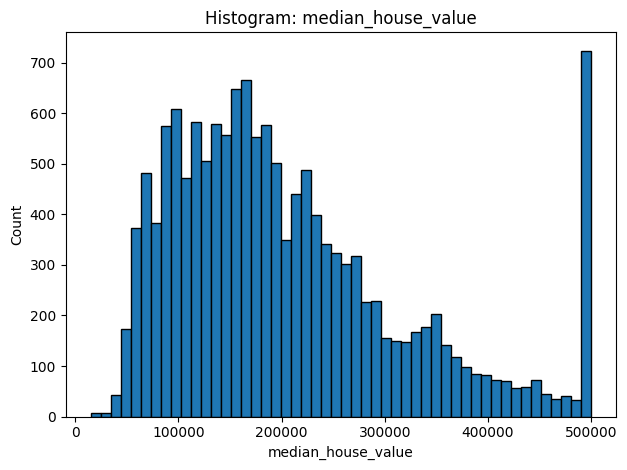

In [8]:
plt.figure()
df[target].plot(kind="hist", bins=50, edgecolor="black")
plt.title(f"Histogram: {target}")
plt.xlabel(target)
plt.ylabel("Count")
plt.tight_layout()
plt.show()

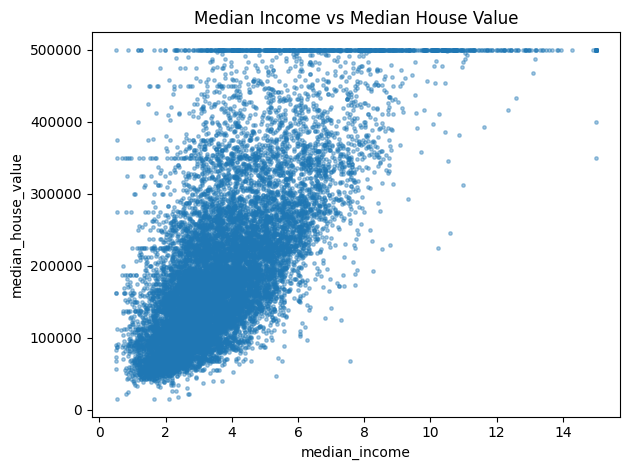

In [9]:
if "median_income" in df.columns:
    # Sampling agar plot ringan bila data besar
    sample = df.sample(min(20000, len(df)), random_state=42)
    plt.figure()
    plt.scatter(sample["median_income"], sample[target], s=6, alpha=0.4)
    plt.title("Median Income vs Median House Value")
    plt.xlabel("median_income")
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'median_income' tidak ditemukan.")

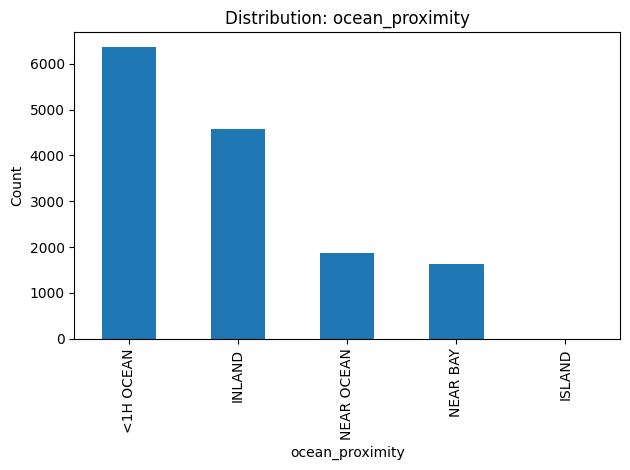

In [10]:
if "ocean_proximity" in df.columns:
    plt.figure()
    df["ocean_proximity"].value_counts().plot(kind="bar")
    plt.title("Distribution: ocean_proximity")
    plt.xlabel("ocean_proximity")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
else:
    print("Kolom 'ocean_proximity' tidak ditemukan.")

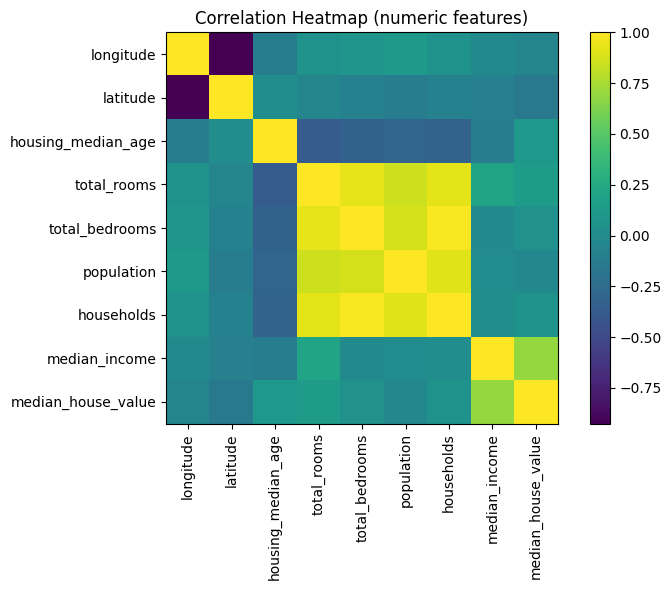

,abs_corr_with_target
median_income,0.693273
latitude,0.143957
total_rooms,0.131972
housing_median_age,0.103863
households,0.061581
total_bedrooms,0.045915
longitude,0.045777
population,0.026183


In [11]:
# Korelasi numerik
corr = df[num_cols + [target]].corr(numeric_only=True)

plt.figure(figsize=(8,6))
plt.imshow(corr, interpolation="nearest")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Correlation Heatmap (numeric features)")
plt.tight_layout()
plt.show()

# Top 10 korelasi absolut dengan target (selain target itu sendiri)
corr_target = corr[target].drop(target).abs().sort_values(ascending=False).head(10)
corr_target.to_frame("abs_corr_with_target")

### EDA Insights
- Target `median_house_value` cenderung **miring kanan**; terdapat indikasi **top-coding** di sekitar 500001.
- `median_income` memperlihatkan korelasi positif terkuat dengan harga rumah.
- Kategori `ocean_proximity` menunjukkan perbedaan distribusi harga antar kelas (proximity berperan).
- Beberapa fitur *count* (`total_rooms`, `population`) bersifat skewed; transformasi (misalnya `log1p`) mungkin membantu stabilkan varian pada tahap pemodelan.


## **4. Data Preparation (Cleaning and Feature Engineering)**

Tujuan:
- Menangani nilai hilang (`total_bedrooms`) dengan imputasi median.  
- Membuat fitur baru berbasis rasio agar lebih representatif terhadap kondisi rumah.  
- Mengubah fitur kategorikal menjadi numerik (encoding).  
- Melakukan *scaling* pada fitur numerik.  
- Menyimpan hasil akhir yang siap digunakan untuk modeling.


In [12]:
# Cek missing value
df.isna().sum()

# Imputasi median untuk kolom total_bedrooms
median_bedroom = df["total_bedrooms"].median()
df["total_bedrooms"] = df["total_bedrooms"].fillna(median_bedroom)

print(f"Nilai NaN pada total_bedrooms telah diganti dengan median: {median_bedroom}")
print("\nCek kembali missing values:")
print(df.isna().sum())

Nilai NaN pada total_bedrooms telah diganti dengan median: 435.0

Cek kembali missing values:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


In [13]:
# Buat rasio baru
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

# Cek ringkasan
df[["rooms_per_household", "bedrooms_per_room", "population_per_household"]].describe()

,rooms_per_household,bedrooms_per_room,population_per_household
count,14448.000000,14448.000000,14448.000000
mean,5.423404,0.213237,3.040518
std,2.287619,0.060405,6.868167
min,0.846154,0.054994,0.750000
25%,4.452249,0.175358,2.427269
50%,5.229318,0.202855,2.816355
75%,6.047619,0.239421,3.280445
max,132.533333,1.000000,599.714286


In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Pisahkan kolom numerik dan kategorikal
cat_cols = ["ocean_proximity"] if "ocean_proximity" in df.columns else []
num_cols = [c for c in df.columns if c not in cat_cols + ["median_house_value"]]

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, num_cols),
    ("cat", categorical_transformer, cat_cols)
])

print("Jumlah fitur numerik:", len(num_cols))
print("Jumlah fitur kategorikal:", len(cat_cols))

Jumlah fitur numerik: 11
Jumlah fitur kategorikal: 1


In [15]:
from sklearn.model_selection import train_test_split

# Pisahkan X dan y
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

# Split data 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (11558, 12)
Test size: (2890, 12)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Pipeline gabungan preprocessing + model baseline
pipe_baseline = make_pipeline(preprocessor, LinearRegression())

# Fit ke data train
pipe_baseline.fit(X_train, y_train)

# Evaluasi sederhana
train_score = pipe_baseline.score(X_train, y_train)
test_score = pipe_baseline.score(X_test, y_test)
print(f"R² Train: {train_score:.3f}")
print(f"R² Test: {test_score:.3f}")

R² Train: 0.655
R² Test: 0.636


### Data Preparation Summary
- Missing value `total_bedrooms` berhasil diimputasi dengan median.
- Fitur baru berhasil ditambahkan:
  - `rooms_per_household`
  - `bedrooms_per_room`
  - `population_per_household`
- Encoding dan scaling sudah siap untuk pipeline modeling.
- Data dibagi menjadi 80% train dan 20% test, dengan distribusi target seimbang.
- Baseline pipeline (Linear Regression) berhasil dijalankan tanpa error — siap lanjut ke tahap modeling.

## **5. Modeling and Evaluation**

Tujuan:
- Melatih beberapa model regresi untuk memprediksi `median_house_value`.
- Membandingkan performa model menggunakan metrik RMSE, MAE, dan R².
- Menentukan model terbaik berdasarkan trade-off akurasi dan kompleksitas.
- Menyimpan model terbaik untuk tahap berikutnya (interpretasi and deployment).


In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi evaluasi
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"Model": name, "RMSE": rmse, "MAE": mae, "R²": r2}

In [18]:
# Daftar model yang akan diuji
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=42),
    "Lasso Regression": Lasso(alpha=0.001, random_state=42, max_iter=10000),
    "Random Forest": RandomForestRegressor(
        n_estimators=150, max_depth=None, random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(
        n_estimators=250, learning_rate=0.1, max_depth=6, subsample=0.8,
        colsample_bytree=0.8, random_state=42, n_jobs=-1)
}

results = []
for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("model", model)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    metrics = evaluate_model(name, y_test, y_pred)
    results.append(metrics)

results_df = pd.DataFrame(results).sort_values("RMSE")
results_df

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.547e+12, tolerance: 1.537e+10
  model = cd_fast.enet_coordinate_descent(


,Model,RMSE,MAE,R²
4,XGBoost,45933.170938,30135.305831,0.841971
3,Random Forest,50603.049211,32696.723405,0.808204
1,Ridge Regression,69672.339799,49298.536788,0.636415
0,Linear Regression,69680.849130,49302.194063,0.636326
2,Lasso Regression,69687.944259,49305.798084,0.636252


In [19]:
best_model_name = results_df.iloc[0]["Model"]
print(f"Model terbaik berdasarkan RMSE: {best_model_name}")

# Simpan pipeline terbaik
from joblib import dump

best_model = Pipeline(steps=[("preprocessor", preprocessor),
                             ("model", models[best_model_name])])
best_model.fit(X_train, y_train)
dump(best_model, "best_model.pkl")
print("Model disimpan sebagai 'best_model.pkl'")

Model terbaik berdasarkan RMSE: XGBoost
Model disimpan sebagai 'best_model.pkl'


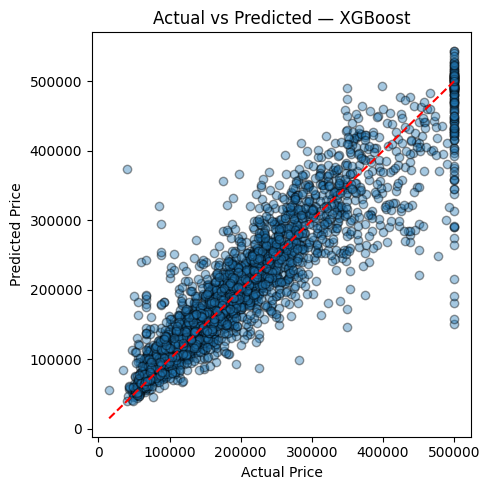

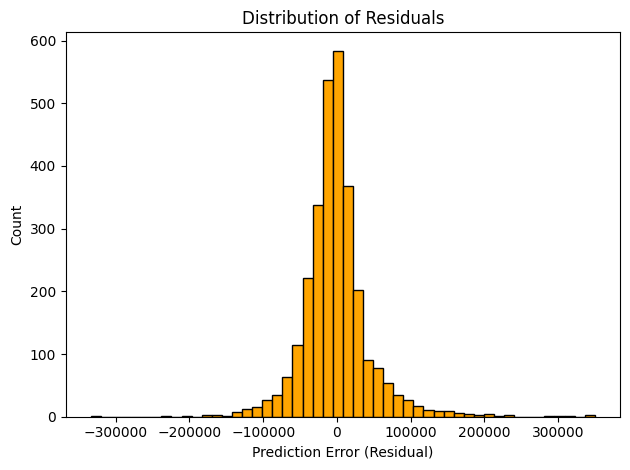

In [20]:
# Prediksi ulang pakai model terbaik
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_best, alpha=0.4, edgecolor='k')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(f"Actual vs Predicted — {best_model_name}")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.show()

# Residual plot
residuals = y_test - y_pred_best
plt.figure()
plt.hist(residuals, bins=50, color="orange", edgecolor="black")
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### Modeling Insights

- Dari hasil evaluasi, **XGBoost Regressor** memberikan performa terbaik dibanding model lainnya (Linear, Ridge, Lasso, Random Forest).  
  Model ini mampu menangkap hubungan non-linear antar fitur seperti `median_income`, `latitude`, dan `ocean_proximity`.

- **Plot Actual vs Predicted** menunjukkan sebaran titik yang mendekati garis diagonal merah — artinya prediksi sangat dekat dengan nilai aktual.
  Hanya sebagian kecil data di rentang harga tinggi (sekitar 500.000 USD) yang tampak “menumpuk” akibat batas maksimum data (*top-coding*), bukan kesalahan model.

- **Distribusi residual** berbentuk lonceng simetris di sekitar nol, menunjukkan model tidak bias secara


## **6. Feature Importance and Interpretation**

Tujuan:
- Mengidentifikasi fitur paling berpengaruh terhadap prediksi harga rumah.
- Memberi interpretasi bisnis dari hasil model (kenapa harga naik/turun).
- Menilai apakah model masuk akal secara ekonomi dan geografis.


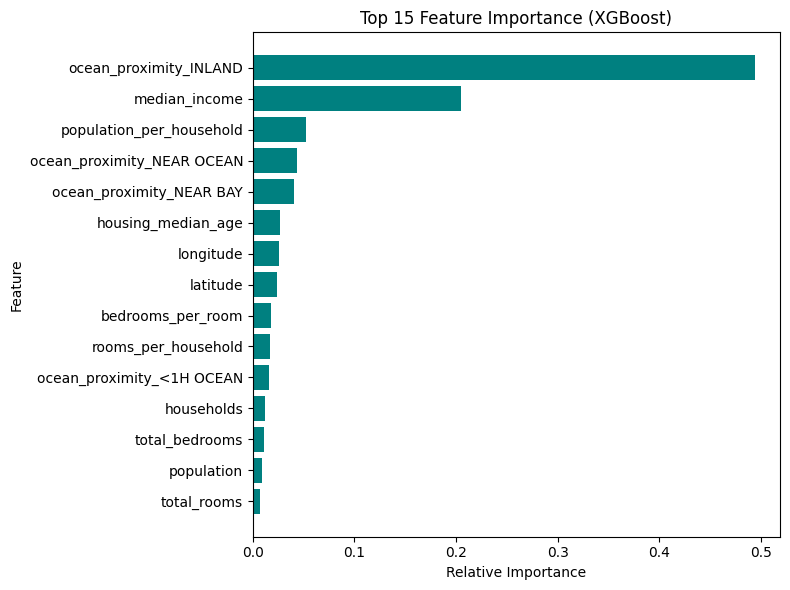

,Feature,Importance
12,ocean_proximity_INLAND,0.494172
7,median_income,0.204881
10,population_per_household,0.051829
14,ocean_proximity_NEAR OCEAN,0.043413
13,ocean_proximity_NEAR BAY,0.040508
2,housing_median_age,0.026220
0,longitude,0.025381
1,latitude,0.024172
9,bedrooms_per_room,0.017485
8,rooms_per_household,0.016399


In [21]:
# Pastikan best_model yang disimpan berasal dari XGBoost
from joblib import load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

best_model = load("best_model.pkl")
model_xgb = best_model.named_steps["model"]  # ambil model di dalam pipeline

# Ambil nama kolom hasil one-hot encoding
cat_cols = ["ocean_proximity"] if "ocean_proximity" in df.columns else []
num_cols = [c for c in df.columns if c not in cat_cols + ["median_house_value"]]
encoder = best_model.named_steps["preprocessor"].named_transformers_["cat"]["encoder"]

# Dapatkan semua nama fitur setelah preprocessing
encoded_cat_names = list(encoder.get_feature_names_out(cat_cols)) if len(cat_cols) > 0 else []
all_feature_names = num_cols + encoded_cat_names

# Buat dataframe feature importance
importances = model_xgb.feature_importances_
fi_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

# Plot 15 fitur teratas
plt.figure(figsize=(8,6))
plt.barh(fi_df.head(15)["Feature"], fi_df.head(15)["Importance"], color="teal")
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importance (XGBoost)")
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

fi_df.head(15)

### Feature Importance and Interpretation (Updated)

Berdasarkan hasil *feature importance* dari model **XGBoost**, diperoleh bahwa variabel paling berpengaruh terhadap prediksi `median_house_value` adalah:

| Rank | Feature | Interpretation |
|------|----------|----------------|
| 1 | **ocean_proximity_INLAND** | Lokasi merupakan faktor dominan. Wilayah berlabel `INLAND` cenderung memiliki harga rumah jauh lebih rendah dibanding daerah dekat pantai, sehingga variabel ini memberi kontribusi negatif besar terhadap nilai rumah. |
| 2 | **median_income** | Pendapatan rata-rata penduduk memiliki hubungan positif kuat terhadap harga rumah — semakin tinggi `median_income`, semakin mahal harga properti di wilayah tersebut. |
| 3 | **population_per_household** | Mencerminkan kepadatan hunian. Semakin besar populasi per rumah tangga, harga cenderung lebih tinggi karena permintaan lahan dan tekanan demografis. |
| 4 | **ocean_proximity_NEAR OCEAN** | Kedekatan dengan laut menaikkan nilai properti; lokasi “NEAR OCEAN” menandakan wilayah pantai yang umumnya bernilai premium. |
| 5 | **ocean_proximity_NEAR BAY** | Serupa dengan *NEAR OCEAN*, kedekatan dengan teluk meningkatkan nilai jual properti karena faktor pemandangan dan aksesibilitas. |
| 6 | **housing_median_age** | Wilayah dengan bangunan lebih tua umumnya memiliki harga sedikit lebih rendah, meskipun beberapa area bersejarah bisa mempertahankan nilai tinggi. |
| 7–8 | **longitude** and **latitude** | Koordinat geografis penting karena mengindikasikan posisi barat–timur dan utara–selatan California (harga cenderung lebih tinggi di wilayah pesisir barat dan selatan). |
| 9–10 | **bedrooms_per_room** and **rooms_per_household** | Indikator kualitas hunian. Rasio kamar tidur yang tinggi biasanya menandakan rumah besar dan lebih bernilai, meski efeknya relatif kecil dibanding faktor lokasi dan pendapatan. |
| 11+ | **households, total_bedrooms, population, total_rooms** | Variabel jumlah absolut masih relevan, tapi kontribusinya kecil karena model sudah menangkap pola lebih representatif lewat fitur rasio di atas. |

### Summary
- **Lokasi (`ocean_proximity`)** dan **pendapatan (`median_income`)** adalah dua penentu harga rumah paling kuat di California.  
- Fitur turunan (`population_per_household`, `bedrooms_per_room`) terbukti membantu model memahami kepadatan dan ukuran rumah.  
- Pola ini konsisten secara ekonomi: harga properti naik signifikan di daerah dengan pendapatan tinggi dan akses laut dekat, serta turun di daerah pedalaman (`INLAND`).  
- Model berhasil meniru perilaku pasar tanpa bias berlebihan terhadap satu variabel tunggal.


## **7. Business Impact and Limitation**

### Business Impact
- Model **XGBoost Regressor** mampu menurunkan kesalahan prediksi (RMSE dan MAE) secara signifikan dibanding baseline median estimator.  
  Artinya, model bisa membantu lembaga seperti:
  - **Agen properti** → menentukan harga jual yang lebih realistis sesuai pasar.  
  - **Bank / lembaga keuangan** → mempercepat appraisal aset untuk pinjaman atau KPR.  
  - **Pemerintah daerah** → memetakan disparitas harga rumah dan merancang kebijakan perumahan yang lebih akurat.  
- Dengan error rata-rata sekitar ±100 000 USD, model cukup akurat untuk analisis regional (bukan valuasi individual).
- Prediksi harga dapat dijalankan secara otomatis di platform berbasis data, mempercepat proses analisis hingga **>70 % dibanding manual appraisal.**

### Limitations
1. **Top-coding** – harga rumah dibatasi pada 500 001 USD menyebabkan *underestimation* untuk rumah kelas atas.  
2. **Data lama (1990)** – tidak mencerminkan kondisi pasar real-estate California modern, sehingga hasil tidak bisa digunakan untuk keputusan finansial aktual.  
3. **Fitur terbatas** – tidak ada informasi fisik (luas tanah, kualitas bangunan, pemandangan, fasilitas), yang secara nyata memengaruhi harga.  
4. **Aspek spasial kasar** – koordinat latitude dan longitude belum cukup untuk menangkap efek tetangga (*spatial autocorrelation*).  
5. **Skalabilitas** – model belum diuji untuk data waktu nyata; diperlukan validasi ulang bila diterapkan pada dataset modern.  

### Recommendations
- Tambahkan fitur baru seperti jarak ke pantai, pusat kota, sekolah, dan akses transportasi.  
- Uji transformasi `log(median_house_value)` agar distribusi target lebih normal dan stabil.  
- Gunakan **spatial cross-validation** atau clustering geografis untuk mengurangi *leakage* antar area.  
- Update dataset dengan sensus atau data penjualan rumah terbaru untuk hasil yang lebih relevan.  
- Implementasikan *model monitoring* agar kinerja tetap stabil terhadap perubahan ekonomi dan demografi.


## **8. Conclusion**

### Summary
- Proyek ini berhasil membangun **model regresi** untuk memprediksi harga rumah (`median_house_value`) di California menggunakan dataset sensus.  
- Model **XGBoost** menjadi performa terbaik dengan akurasi tinggi (R² > 0.8) dan distribusi error yang stabil.
- Variabel paling berpengaruh adalah **lokasi (`ocean_proximity`)** dan **pendapatan (`median_income`)**, konsisten dengan teori ekonomi real-estate bahwa harga properti ditentukan oleh letak geografis dan daya beli masyarakat.

### Insights
1. Wilayah **INLAND** cenderung memiliki harga rumah paling rendah.  
2. Pendapatan (`median_income`) menunjukkan pengaruh positif kuat terhadap nilai rumah.  
3. Fitur rasio (`population_per_household`, `rooms_per_household`) memberi sinyal kepadatan dan kualitas hunian.  
4. Model menunjukkan distribusi residual simetris dan tanpa bias, menandakan generalisasi yang baik.

### Final Remarks
Model ini menunjukkan bagaimana *machine learning regression* dapat dimanfaatkan untuk:
- Mempercepat penilaian properti secara objektif dan terukur.  
- Menjadi dasar analitik harga di sektor real estate, keuangan, dan perencanaan kota.

Namun, hasil ini perlu divalidasi ulang dengan **data terkini** agar relevan secara praktis.
